In [83]:
using PyPlot;
using Revise;
using MDToolbox;
using StatsBase; # for calculating histogram
using Printf;
using DelimitedFiles;
using Distributions;
using LinearAlgebra;
using GLM;
using DataFrames;
PyPlot.plt[:style][:use]("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[83]:11
└ @ Core In[83]:11
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[83]:11
└ @ Core In[83]:11


In [84]:
# setup constants
KBT = KB_kcalpermol*300.0
sigma = 30.0
sigma_matrix = (sigma^2) * Matrix{Float64}(I, 2, 2)

2×2 Array{Float64,2}:
 900.0    0.0
   0.0  900.0

In [85]:
# umbrella window centers
phi_centers = -180:15:-15
psi_centers = 165:-15:0
umbrella_centers_num = length(phi_centers) * length(psi_centers)

umbrella_centers = zeros(Float64, umbrella_centers_num, 2)
umbrella_center_index = 0
for i = 1:length(psi_centers)
    for j = 1:length(phi_centers)
        umbrella_center_index += 1
        umbrella_centers[umbrella_center_index, :] = [phi_centers[j], psi_centers[i]]
    end
end

umbrella_centers

144×2 Array{Float64,2}:
 -180.0  165.0
 -165.0  165.0
 -150.0  165.0
 -135.0  165.0
 -120.0  165.0
 -105.0  165.0
  -90.0  165.0
  -75.0  165.0
  -60.0  165.0
  -45.0  165.0
  -30.0  165.0
  -15.0  165.0
 -180.0  150.0
    ⋮         
 -180.0    0.0
 -165.0    0.0
 -150.0    0.0
 -135.0    0.0
 -120.0    0.0
 -105.0    0.0
  -90.0    0.0
  -75.0    0.0
  -60.0    0.0
  -45.0    0.0
  -30.0    0.0
  -15.0    0.0

In [86]:
# define edges for bin
bin_phi_edge = range(-180, stop=0, length=181)
bin_psi_edge = range(180,  stop=0, length=181)

bin_centers = []
for i = 1:length(bin_phi_edge)
    for j = 1:length(bin_psi_edge)
        push!(bin_centers, [bin_phi_edge[i], bin_psi_edge[j]])
    end
end

bin_centers

32761-element Array{Any,1}:
 [-180.0, 180.0]
 [-180.0, 179.0]
 [-180.0, 178.0]
 [-180.0, 177.0]
 [-180.0, 176.0]
 [-180.0, 175.0]
 [-180.0, 174.0]
 [-180.0, 173.0]
 [-180.0, 172.0]
 [-180.0, 171.0]
 [-180.0, 170.0]
 [-180.0, 169.0]
 [-180.0, 168.0]
 ⋮              
 [0.0, 11.0]    
 [0.0, 10.0]    
 [0.0, 9.0]     
 [0.0, 8.0]     
 [0.0, 7.0]     
 [0.0, 6.0]     
 [0.0, 5.0]     
 [0.0, 4.0]     
 [0.0, 3.0]     
 [0.0, 2.0]     
 [0.0, 1.0]     
 [0.0, 0.0]     

In [87]:
# read dihedral angle data
data_k = []
for i = 1:umbrella_centers_num
  filename = @sprintf "4_prod/run_%d_%d.dat" umbrella_centers[i, 1] umbrella_centers[i, 2]
  x = readdlm(filename);
  push!(data_k, x[:, 2:3])
end

data_k[2]

500×2 Array{Float64,2}:
 -164.972  164.108
 -160.911  168.567
 -171.679  161.774
 -156.049  161.583
 -167.606  162.016
 -159.983  169.105
 -164.515  160.117
 -162.961  156.088
 -159.895  160.316
 -158.784  165.7  
 -170.123  165.196
 -159.501  163.44 
 -164.404  166.269
    ⋮             
 -167.185  168.067
 -164.316  167.479
 -165.717  171.068
 -165.84   166.974
 -162.045  163.492
 -162.985  167.539
 -165.373  163.048
 -160.657  166.925
 -160.15   173.386
 -166.56   165.407
 -164.746  163.245
 -161.038  154.175

In [88]:
# ΔWの計算
include("Density.jl")
include("PotentialOfMeanForce.jl")

delta_pmfs = []
for i = 1:umbrella_centers_num
    for j = 1:size(data_k[i], 1)
        push!(delta_pmfs, calc_delta_potential_of_mean_force(umbrella_centers[i, :], data_k[i], sigma_matrix, KBT, data_k[i][j, :]))
    end
end

delta_pmfs

72000-element Array{Any,1}:
 -4.935462276902977   
 -0.13490157386041274 
 -0.9349085969860804  
 -1.3748726779391758  
 -1.1504412963612665  
 -2.4683863999374074  
 -0.49775183782894206 
 -0.3091602460611814  
 -0.7611271573622848  
 -0.7110066893513591  
 -0.5545981427852518  
 -0.010861358464824932
 -0.22378719651242993 
  ⋮                   
 -2.9009642295406306  
 -8.61778791894545    
 -2.784956999836652   
 -2.35182498928542    
 -1.414631090062178   
 -4.2121371042153175  
 -0.009414331228022389
 -0.8915792356582698  
 -3.2281529969629923  
 -1.6465018544903123  
 -0.6778964941498379  
 -1.0001356198266487  

In [89]:
# 設計行列の計算

include("DesignMatrix.jl")
M = calc_design_matrix(umbrella_centers, data_k, sigma_matrix)

72000×144 Array{Float64,2}:
 0.000158766  0.00017406   0.000148616  9.88233e-5   …  3.28669e-14  4.87652e-15  5.63493e-16  5.07099e-17
 0.000176341  0.000160649  0.00011398   6.29801e-5      2.56545e-14  3.16299e-15  3.0371e-16   2.27115e-17
 0.000173301  0.000167841  0.000126596  7.43647e-5      2.16964e-14  2.84377e-15  2.90287e-16  2.30774e-17
 0.000171656  0.000171116  0.000132846  8.0322e-5       4.35507e-14  5.87541e-15  6.17316e-16  5.0513e-17 
 0.000172479  0.000167228  0.000126272  7.42565e-5      1.70894e-14  2.24239e-15  2.29151e-16  1.82372e-17
 0.000167568  0.000168692  0.000132258  8.07565e-5   …  1.48236e-14  2.01961e-15  2.14293e-16  1.77082e-17
 0.000174951  0.000163679  0.00011926   6.76742e-5      1.55398e-14  1.96758e-15  1.9402e-16   1.49e-17   
 0.000175681  0.000163344  0.000118278  6.67012e-5      3.13351e-14  3.94292e-15  3.86395e-16  2.94898e-17
 0.00017396   0.000167058  0.000124943  7.27752e-5      2.16378e-14  2.81217e-15  2.84641e-16  2.24378e-17
 0.000174

In [90]:
# 最小二乗推定で重みを計算する

U, S, V = svd(M) # 特異値分解
inverse_M = V * inv(Diagonal(S)) * U' # 擬似逆行列
weight = inverse_M * delta_pmfs

144-element Array{Any,1}:
  3.521601477249011e9  
 -1.557766977883767e10 
  3.6898219432758705e10
 -6.148226813563434e10 
  7.99671428801204e10  
 -8.546008412226602e10 
  7.694351879649097e10 
 -5.871070487861165e10 
  3.744279205794606e10 
 -1.9125327283061623e10
  7.079752037088048e9  
 -1.442459738710411e9  
 -1.465960834336196e10 
  ⋮                    
 -1.1236039024517636e9 
  5.04308393660395e9   
 -1.208462456885396e10 
  2.025996743564303e10 
 -2.633474536292344e10 
  2.7912994035460003e10
 -2.473072052286076e10 
  1.8424304468071617e10
 -1.1383897290390816e10
  5.585725129441347e9  
 -1.966410057603166e9  
  3.7460816434465367e8 

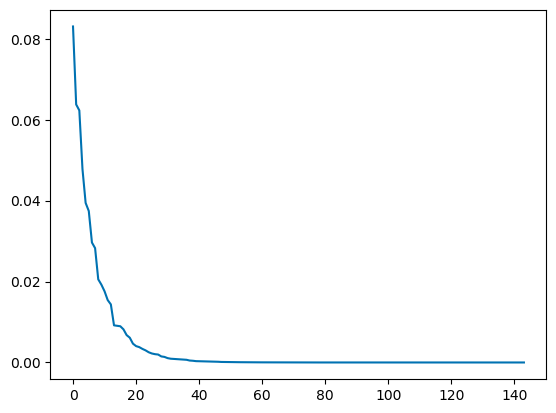

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1409f89e8>

In [91]:
plot(S)

In [92]:
# PMFの計算
include("PotentialOfMeanForce.jl")

pmf = calc_potential_of_mean_force(umbrella_centers, bin_centers, weight, sigma_matrix)
pmf = reshape(pmf, size(bin_phi_edge, 1), size(bin_psi_edge, 1))

181×181 Array{Any,2}:
 -1.39994   -3.00259   -4.11716   -4.79301   -5.08215  …  -6.26028   -8.38897   -10.7029      -13.1963  
 -1.31462   -2.79613   -3.83079   -4.46357   -4.74187     -5.0461    -6.91317    -8.94841     -11.147   
 -1.23373   -2.59654   -3.5526    -4.14266   -4.40963     -3.8767    -5.49089    -7.25669      -9.17007 
 -1.15772   -2.40484   -3.28404   -3.83195   -4.08719     -2.75773   -4.12898    -5.63582      -7.27506 
 -1.08695   -2.22198   -3.02643   -3.533     -3.77619     -1.69436   -2.83364    -4.09317      -5.47049 
 -1.02176   -2.0488    -2.78098   -3.24724   -3.47814  …  -0.691152  -1.61042    -2.63527      -3.76397 
 -0.962404  -1.88603   -2.54875   -2.97594   -3.19442      0.247896  -0.464114   -1.2678       -2.16211 
 -0.90907   -1.73429   -2.33065   -2.7202    -2.92623      1.11945    0.601251    0.00447564   -0.670462
 -0.861885  -1.59407   -2.12747   -2.48098   -2.67461      1.92084    1.58246     1.17775       0.706549
 -0.820907  -1.46575   -1.93979  

In [93]:
pmf = pmf .- minimum(pmf)

181×181 Array{Float64,2}:
 17.1252  15.5225  14.408   13.7321  13.443   13.4867  …  14.2046  12.2649  10.1362   7.82224   5.32881
 17.2105  15.729   14.6943  14.0616  13.7833  13.8104     15.1749  13.479   11.612    9.57673   7.37817
 17.2914  15.9286  14.9725  14.3825  14.1155  14.1272     16.1087  14.6484  13.0342  11.2685    9.35507
 17.3674  16.1203  15.2411  14.6932  14.4379  14.4354     17.0013  15.7674  14.3962  12.8893   11.2501 
 17.4382  16.3032  15.4987  14.9921  14.749   14.7334     17.8487  16.8308  15.6915  14.432    13.0546 
 17.5034  16.4763  15.7442  15.2779  15.047   15.0198  …  18.6471  17.834   16.9147  15.8899   14.7612 
 17.5627  16.6391  15.9764  15.5492  15.3307  15.2931     19.3933  18.773   18.061   17.2573   16.363  
 17.6161  16.7908  16.1945  15.8049  15.5989  15.5522     20.0846  19.6446  19.1264  18.5296   17.8547 
 17.6633  16.9311  16.3977  16.0442  15.8505  15.796      20.7189  20.446   20.1076  19.7029   19.2317 
 17.7042  17.0594  16.5853  16.2661  1

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[94]:8
└ @ Core In[94]:8
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[94]:9
└ @ Core In[94]:9


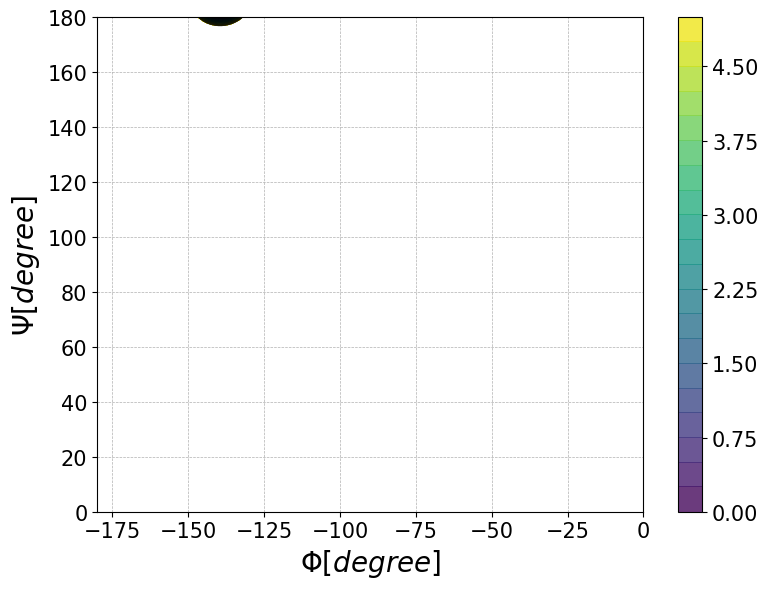

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = top-level scope at In[94]:10
└ @ Core In[94]:10
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[94]:11
└ @ Core In[94]:11
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[94]:11
└ @ Core In[94]:11
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[94]:14
└ @ Core In[94]:14
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` 

In [94]:
# 図示
fig, ax = subplots(figsize=(8, 6));
meshgrid(x, y) = (repeat(x', length(y), 1), repeat(y, 1, length(x)));
grid_x = -180:1:0;
grid_y = 180:-1:0;
X, Y = meshgrid(grid_x, grid_y);
levels = 0:0.25:5.0;
ax[:contour](X, Y, pmf, levels, colors="black", alpha=1.0, linewidths=0.5);
pos = ax[:contourf](X, Y, pmf, levels, alpha=0.8, cmap=get_cmap("viridis")) # colormaps: viridis, plasma, inferno, magma, jet, hsv, terrain
cbar = fig[:colorbar](pos, ax=ax);
cbar[:ax][:tick_params](labelsize=15);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 0], ylim=[0, 180]);
ax[:tick_params](axis="both", which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("free_energy_surface2.png", dpi=350, bbox_inches="tight");